In [1]:
import pandas as pd

# Path to the CSV file
file_path = r"C:\Users\smdur\OneDrive\Desktop\HFT\EVT_modeloutput2.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
#df = df[df['SAMPLE_1'] == 1 ]


In [2]:
# Assuming df is your DataFrame and SAMPLE_evt1 is the column for which you want unique values
unique_values = df['SAMPLE_evt1'].unique()

# Print the unique values
print(unique_values)
print(len(unique_values))

[7107 7126 7011 7051 7016 7055 7050 7054 7145 9828 7967 9328 9022 7146
 9519 7086 7061 7117 9019 9017 7052 9309 7901 9021 7056 7292 7904 7965
 9011 9329 9018 7900 9001 7920 7057 7923 7921 7296 7297 7299 7966 7902
 7963 7924 9829 7135 7080 7127 9004 7903 7153 9016 7144 7070 7143 7922
 9308 9827 9336 7295 7298 7735 7062 7125 7147 9024 7049 7149 7968 9307
 7081 7059 7064 9009 7066 7102 7964 7960 9028 7093 9327 7115]
82


In [3]:
import pandas as pd

# Load the mapping from the CSV file you provided
mapping_df = pd.read_csv(r"C:\Users\smdur\Downloads\dictionaryforEVT.csv", header=None)

evt_mapping = dict(zip(mapping_df[1], mapping_df[7]))
evt_mapping

df['EVT_LF'] = df['SAMPLE_evt1'].map(evt_mapping)
dfp = df[df['VALUE'] < 0.5]

dfm = df[df['VALUE'] > 0.5]

In [6]:
unique_counts = df['EVT_LF'].value_counts()
print(unique_counts)

proportions = df['EVT_LF'].value_counts(normalize=True)
print(proportions)


EVT_LF
Tree           5615435
Herb            733862
Shrub           688125
Sparse          427402
Snow-Ice         58112
Developed        41329
Water            35717
Barren            2790
Agriculture       1612
Name: count, dtype: int64
EVT_LF
Tree           0.738447
Herb           0.096505
Shrub          0.090491
Sparse         0.056205
Snow-Ice       0.007642
Developed      0.005435
Water          0.004697
Barren         0.000367
Agriculture    0.000212
Name: proportion, dtype: float64


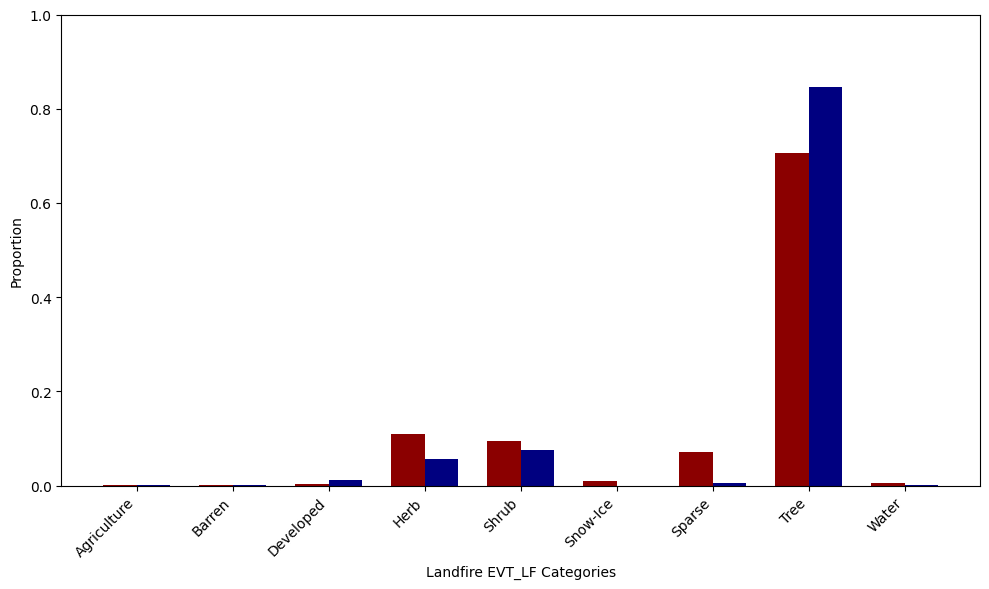

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming dfp['EVT_LF'] and dfm['EVT_LF'] contain categorical values like 'Low', 'Medium', 'High'
evt_lf_counts_p = dfp['EVT_LF'].value_counts()
evt_lf_counts_m = dfm['EVT_LF'].value_counts()

# Calculate proportions for dfp
total_entries_p = len(dfp['EVT_LF'])
evt_lf_proportions_p = evt_lf_counts_p / total_entries_p

# Calculate proportions for dfm
total_entries_m = len(dfm['EVT_LF'])
evt_lf_proportions_m = evt_lf_counts_m / total_entries_m

# Ensure the order of categories is the same for both datasets
all_categories = pd.Index.union(evt_lf_proportions_p.index, evt_lf_proportions_m.index)
evt_lf_proportions_p = evt_lf_proportions_p.reindex(all_categories, fill_value=0)
evt_lf_proportions_m = evt_lf_proportions_m.reindex(all_categories, fill_value=0)

# Specify your desired order here.
# desired_order = ['Tree', 'Herb', 'Shrub', 'Grass', 'Developed', 'Agriculture', 'Water', 'Barren', 'Snow/Ice', 'Sparse']

# # Reindex the Series to the desired order.
# evt_lf_proportions_p = evt_lf_proportions_p.reindex(desired_order).fillna(0)
# evt_lf_proportions_m = evt_lf_proportions_m.reindex(desired_order).fillna(0)

# Set up the figure and axes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Bar width
width = 0.35

# Index for the categories
indices = np.arange(len(all_categories))

# Plotting
bar1 = ax.bar(indices - width/2, evt_lf_proportions_p, width, label='Prescribed Fire', color = 'darkred')
bar2 = ax.bar(indices + width/2, evt_lf_proportions_m, width, label='Mechanical Treatment', color = 'navy')

# Labeling
ax.set_xlabel('Landfire EVT_LF Categories')
ax.set_ylabel('Proportion')
#ax.set_title('Comparison of EVT_LF Proportions: Prescribed Fire vs Mechanical Treatment')
ax.set_xticks(indices)
ax.set_xticklabels(all_categories)
#ax.legend()
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping labels
#plt.savefig('C:\\Users\\smdur\\OneDrive\\Desktop\\HFT\\figures\\modeloutputclassificationclasses.png', bbox_inches='tight')
plt.show()
